In [7]:
#проверим нашу модель
#Изучим свою сохраненную модель
import os
MODEL_DIR = "f:\dip\model"
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
!saved_model_cli show --dir "$export_path" --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 95, 150, 1)
        name: serving_default_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 9)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Defined Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          inputs: TensorSpec

In [4]:
#запустим под windows установив Docker в Windows 10 через установку Установка WSL 2 и его интеграцию видв
#PS dism.exe /online /enable-feature /featurename:Microsoft-Windows-Subsystem-Linux /all /norestart
#PS dism.exe /online /enable-feature /featurename:VirtualMachinePlatform /all /norestart
#установка обнавления http://aka.ms/wsl2kernelmsix64
# по умалчанию PS wsl --set-default-version 2
# установки дистрибутив Linux через Microsoft Store, например, Ubuntu 20.04 LTS
# и установки Docker затем
# PS F:\tf_test> docker run -t --rm -d -p 8501:8501 -v "f:/dip/model:/models/water_level" -e MODEL_NAME=water_level tensorflow/serving
# a350e5c15f20771d5c5de3ce4e39b7f15ed58af593cc68835fa6530277619504
# PS F:\tf_test> docker container ls
# CONTAINER ID   IMAGE                COMMAND                  CREATED         STATUS         PORTS                                                 NAMES
# a350e5c15f20   tensorflow/serving   "/usr/bin/tf_serving…"   9 seconds ago   Up 8 seconds   8500/tcp, 0.0.0.0:8501->8501/tcp, :::8501->8501/tcp   vibrant_clarke

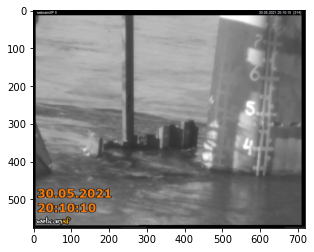

In [2]:
#проверка
#скачаем новое актуальное изображение
import urllib.request
import requests
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img

def downloading(url): 
  filename = url.split('/')[-1]
  r = requests.get(url, allow_redirects=True)
  open(filename, 'wb').write(r.content)

downloading('http://uznt42.ru/FTP/Webcam/cam_1.jpg')
img = mpimg.imread('cam_1.jpg')
plt.imshow(img)
plt.show()



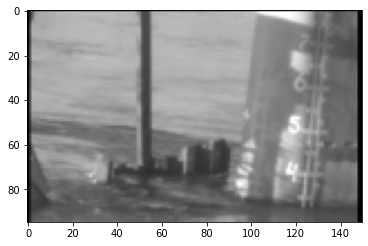

(95, 150, 1)


In [15]:
#готовим в формате обученной сети
import cv2
import os 
def correctImg(name):
    img1=cv2.imread(name)
    crop_img = img1[10:470, 0:720]
    crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)    
    r = 150.0 / crop_img.shape[1]
    dim = (150, int(crop_img.shape[0] * r))
    aaa = cv2.resize(crop_img, dim, interpolation=cv2.INTER_AREA)
    return aaa

img1 = correctImg('cam_1.jpg')
img1=img1.reshape(95,150,1)
plt.imshow(img1,cmap='gray')
plt.show()

print(img1.shape)


In [37]:
# import json
# data = json.dumps({"signature_name": "serving_default", "instances": img1.tolist()})
# print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))
# headers = {"content-type": "application/json"}
# json_response = requests.post('http://localhost:8501/v1/models/water_level:predict', data=data, headers=headers)
# predictions = json.loads(json_response.text) #['predictions']
# print(predictions)


Data: {"signature_name": "serving_default", "instances": ... 73], [74], [74], [73], [72], [69], [68], [7], [0]]]}
{'error': 'input must be 4-dimensional[95,150,1]\n\t [[{{node model/conv2d/Relu}}]]'}


In [39]:
# #опа ошибочка
# import numpy as np
# img1=img1[np.newaxis,...]
# print(img1.shape)
# #теперь норм

(1, 95, 150, 1)


In [41]:
# data = json.dumps({"signature_name": "serving_default", "instances": img1.tolist()})
# headers = {"content-type": "application/json"}
# json_response = requests.post('http://localhost:8501/v1/models/water_level:predict', data=data, headers=headers)
# predictions = json.loads(json_response.text)['predictions']
# print(predictions)
# aa=np.argmax(predictions, axis=1)
# print(aa)

[[8.57398614e-12, 4.72882401e-15, 2.54728899e-12, 3.93086605e-12, 2.76892699e-14, 1.50838326e-13, 2.54307297e-10, 5.06858591e-08, 1.0]]
[8]


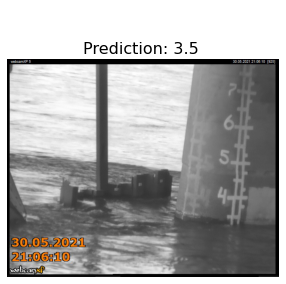

In [50]:
#оформим все функцией
import json
import numpy as np

def predictimg(img):
    data = json.dumps({"signature_name": "serving_default", "instances": img.tolist()})
    headers = {"content-type": "application/json"}
    json_response = requests.post('http://localhost:8501/v1/models/water_level:predict', 
                                  data=data, headers=headers)
    predictions = json.loads(json_response.text)['predictions']
    return predictions
    

def predictmy():
    downloading('http://uznt42.ru/FTP/Webcam/cam_1.jpg')
    img = mpimg.imread('cam_1.jpg')    
    img1 = correctImg('cam_1.jpg')
    img1=img1.reshape(95,150,1)
    img1=img1[np.newaxis,...]
    predictions = predictimg(img1)
    return (img , np.argmax(predictions, axis=1))
    
#классы мои уровень в метрах
classnames = ['5.5', '5.25', '5', '4.75', '4.5', '4.25', '4', '3,75', '3.5']
classnamesval = [5.5, 5.25, 5, 4.75, 4.5, 4.25, 4, 3.75, 3.5]
#отоброжение
def show(idx, title):
  plt.figure()
  plt.imshow(idx, cmap=plt.cm.binary)
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})
idx, clasid=predictmy()    
show(idx, 'Prediction: {} '.format(classnames[int(clasid)]))


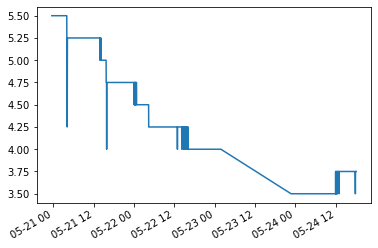

In [57]:
#посмотрим как менялся уровень по датасету
from datetime import datetime
root="f:\dip\imagclass"
allfile=[]
for path, subdirs, files in os.walk(root):
    for name in files:        
         allfile.append(os.path.join(path, name))
x=[]
y=[]
for file in allfile:
    dt=os.path.basename(file).split(".")[0]
    date_time_fl = datetime.strptime(dt, '%Y_%m_%d_%H_%M_%S')
    x.append(date_time_fl)
    img=cv2.imread(file)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    img=img.reshape(95,150,1)
    img=img[np.newaxis,...]
    yy=np.argmax(predictimg(img), axis=1)    
    y.append(classnamesval[int(yy)])

aa=np.argsort(x)
xsort=[]
ysort=[]
for sortindx in aa:
    xsort.append(x[sortindx])
    ysort.append(y0y[sortindx])

plt.plot(xsort,ysort)
#beautify the x-labels
plt.gcf().autofmt_xdate()
plt.show()  